#        MAJOR PROJECT                                                 -ypsnikhil09@gmail.com

## Problem Statement: Predict the costs of used cars given the data collected from various sources and distributed across varioud locations in india

### Note: RMS and R2 Score values of test data and train data are calculated at : In [1042] & In[1043]
### Heat map is shown at : In [1058]

## Data Preprocessing

In [942]:
import pandas as pd
data_train=pd.read_excel('data_train.xlsx')

In [943]:
data_train.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price'],
      dtype='object')

In [944]:
data_train.head(30)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,2.35
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,3.50
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,17.50
8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,5.20
9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,5.0,1.95


In [945]:
brand_name=[]
model_name=[]
for index,rows in data_train.iterrows():
    brand_name.append(rows['Name'].split()[0].lower())
    model_name.append(rows['Name'].split()[1].lower())

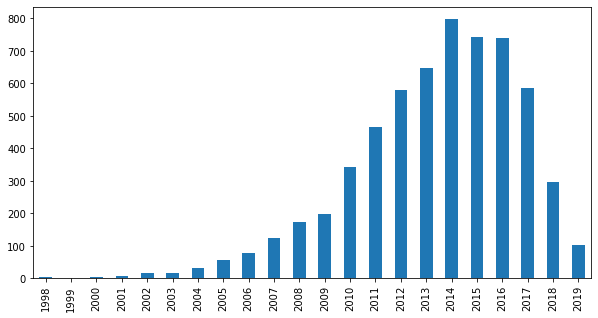

In [946]:
import matplotlib.pyplot as plt
data_train.Year.value_counts().sort_index().plot(kind='bar')
plt.show()

## EDA

In [947]:
data_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


## Univariate Analysis

### location

In [948]:
data_train.Location.unique()

array(['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad'],
      dtype=object)

### data distribution among cities

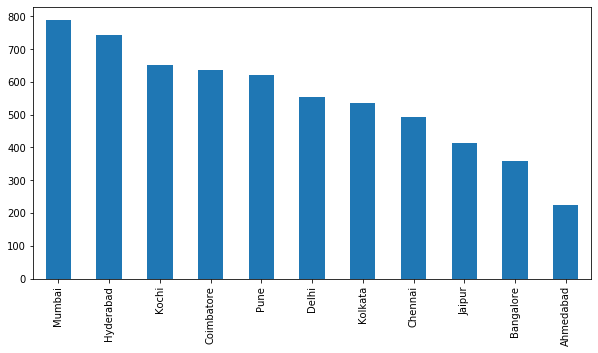

In [949]:
import matplotlib.pyplot as plt
data_train.Location.value_counts().plot(kind='bar')
plt.show()

### Brand Name

In [950]:
brand_name=[]
model_name=[]
for index,rows in data_train.iterrows():
    brand_name.append(rows['Name'].split()[0].lower().replace('-',''))
    model_name.append(rows['Name'].split()[1].lower())

In [951]:
data_train['Brand']=brand_name

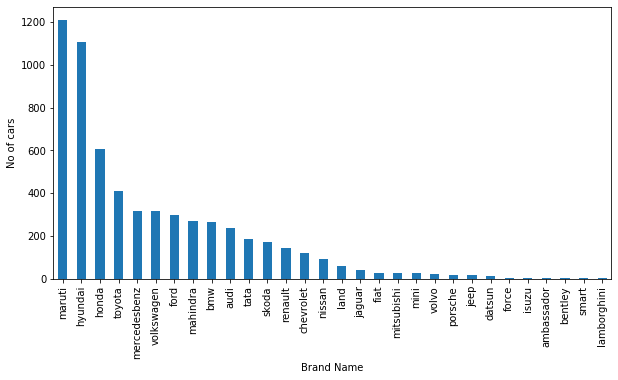

In [952]:
plt.rcParams["figure.figsize"]=[10,5]
data_train.Brand.value_counts().plot(kind='bar')
plt.xlabel('Brand Name')
plt.ylabel('No of cars')
plt.show()

maruthi and hyundai arre the highest no of cars in the dataset

### Year

In [953]:
data_train.Year.describe()

count    6019.000000
mean     2013.358199
std         3.269742
min      1998.000000
25%      2011.000000
50%      2014.000000
75%      2016.000000
max      2019.000000
Name: Year, dtype: float64

we have data from 1998 to 2019

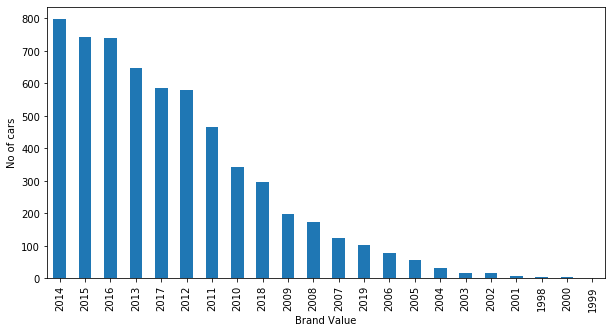

In [954]:
data_train.Year.value_counts().plot(kind='bar')
plt.xlabel('Brand Value')
plt.ylabel('No of cars')
plt.show()

more data is available from 2010-2018

In [955]:
import numpy as np
p=[]
for i in range(1,101,1):
    p.append(np.percentile(data_train.Kilometers_Driven,i))

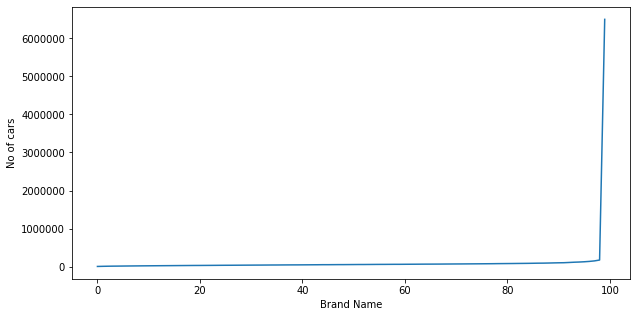

In [956]:
plt.plot(p)
plt.xlabel('Brand Name')
plt.ylabel('No of cars')
plt.show()

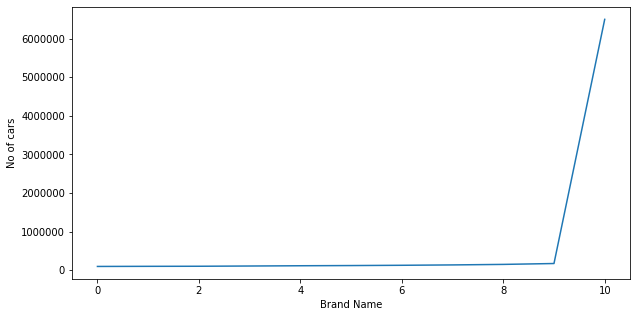

In [957]:
import numpy as np
p=[]
for i in range(90,101,1):
    p.append(np.percentile(data_train.Kilometers_Driven,i))
    
plt.plot(p)
plt.xlabel('Brand Name')
plt.ylabel('No of cars')
plt.show()

only one value is around 60L,which could be an outlier

In [958]:
data_train[data_train.Kilometers_Driven>=600000]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,2013,775000,Diesel,Automatic,First,19.3 kmpl,1968 CC,141 bhp,5.0,7.5,skoda
358,Hyundai i10 Magna 1.2,Chennai,2009,620000,Petrol,Manual,First,20.36 kmpl,1197 CC,78.9 bhp,5.0,2.7,hyundai
1860,Volkswagen Vento Diesel Highline,Chennai,2013,720000,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,5.9,volkswagen
2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97 kmpl,2993 CC,258 bhp,5.0,65.0,bmw


### Fuel Type

In [959]:
data_train.Fuel_Type.value_counts()

Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64

More cars are of diesel and petrol type

### Transmission

In [960]:
data_train.Transmission.value_counts()

Manual       4299
Automatic    1720
Name: Transmission, dtype: int64

### Owner Type

In [961]:
data_train.Owner_Type.value_counts()

First             4929
Second             968
Third              113
Fourth & Above       9
Name: Owner_Type, dtype: int64

## Removing Outliers

## Null Columns

In [962]:
for i in data_train.columns:
    if len(data_train[data_train[i].isnull()].index)>0:
        print(i,'Has Null values count : ',len(data_train[data_train[i].isnull()].index))

Mileage Has Null values count :  2
Engine Has Null values count :  36
Power Has Null values count :  36
Seats Has Null values count :  42


### Mileage

In [963]:
data_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,audi


In [964]:
data_train[data_train['Mileage'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.0,13.00,mahindra
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.0,12.75,toyota


In [965]:
data_train['is_electric']=data_train['Fuel_Type'].apply(lambda x:1 if x=='Electric' else 0)

In [966]:
Mileage_cleaned=[]
Engine_cleaned=[]
Power_cleaned=[]
for index, rows in data_train.iterrows():
    try:
        Mileage_cleaned.append(rows['Mileage'].split()[0])
    except:
        Mileage_cleaned.append(0)
    try:
        Engine_cleaned.append(rows['Engine'].split()[0])
    except:
        Engine_cleaned.append(0)
    try:
        if rows['Power'].split()[0]=='null':
            Power_cleaned.append(0)
        else:
            Power_cleaned.append(rows['Power'].split()[0])
    except:
        Power_cleaned.append(0)

In [967]:
data_train['Mileage_cleaned']=Mileage_cleaned
data_train.Mileage_cleaned=data_train.Mileage_cleaned.astype(float)
data_train['Engine_cleaned']=Engine_cleaned
data_train.Engine_cleaned=data_train.Engine_cleaned.astype(float)
data_train['Power_cleaned']=Power_cleaned
data_train.Power_cleaned=data_train.Power_cleaned.astype(float)

### Engine

In [968]:
data_train[ (data_train.Engine_cleaned.between(2179,3000))]['Mileage_cleaned'].mean()

13.019018595041299

In [969]:
Mileage_missing=[]
for i,j in data_train[(data_train['Mileage_cleaned']==0)].iterrows():
    if j.Engine_cleaned!=0:
        Mileage_missing.append(data_train[(data_train.Power_cleaned.between(j.Power_cleaned-50,j.Power_cleaned+50)) & (data_train.Engine_cleaned.between(j.Engine_cleaned-50,j.Engine_cleaned+50))] ['Power_cleaned'].mean())
    else:
        Mileage_missing.append(data_train[(data_train.Engine_cleaned.between(j.Engine_cleaned-100,j.Engine_cleaned+100))]['Mileage_cleaned'].mean())
else:
    if j.Power_cleaned!=0:
        Mileage_missing.append(data_train[(data_train.Power_cleaned.between(j.Power_cleaned-50,j.Power_cleaned+50))]['Mileage_cleaned'].mean())
    else:
        Mileage_missing.append(0)

In [970]:
data_train.to_pickle('data_train')

In [971]:
import pandas as pd
data_train=pd.read_pickle('data_train')

### Filling up null values for Mileage

In [972]:
j=0
for i in data_train[(data_train['Mileage_cleaned']==0)]['Mileage_cleaned'].index.tolist():
    data_train['Mileage_cleaned'].iloc[i]=Mileage_missing[j]
    j+=1

C:\Users\NIKHIL\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [973]:
data_train.Mileage_cleaned[data_train.Mileage_cleaned==0] = data_train['Mileage_cleaned'].mean()

C:\Users\NIKHIL\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [974]:
data_train['Mileage_cleaned'].describe()

count    6019.000000
mean       18.925764
std        10.600605
min         1.205128
25%        15.300000
50%        18.200000
75%        21.100000
max       262.600000
Name: Mileage_cleaned, dtype: float64

In [975]:
for i in data_train.columns:
    if len(data_train[data_train[i].isnull()].index)>0:
           print(i,'has null values count : ',len(data_train[data_train[i].isnull()].index))

Mileage has null values count :  2
Engine has null values count :  36
Power has null values count :  36
Seats has null values count :  42


### Filling up missing values for Engine

In [976]:
pm=data_train[(data_train['Fuel_Type']=='Petrol') & (data_train['Transmission']=='Manual')].Engine_cleaned.mean()
dm=data_train[(data_train['Fuel_Type']=='Diesel') & (data_train['Transmission']=='Manual')].Engine_cleaned.mean()
da=data_train[(data_train['Fuel_Type']=='Diesel') & (data_train['Transmission']=='Automatic')].Engine_cleaned.mean()
pa=data_train[(data_train['Fuel_Type']=='Petrol') & (data_train['Transmission']=='Automatic')].Engine_cleaned.mean()

In [977]:
data_train.Engine_cleaned.loc[(data_train['Fuel_Type']=='Petrol') & (data_train['Transmission']=='Manual') & (data_train['Engine_cleaned']==0)]=pm
data_train.Engine_cleaned.loc[(data_train['Fuel_Type']=='Diesel') & (data_train['Transmission']=='Manual') & (data_train['Engine_cleaned']==0)]=dm
data_train.Engine_cleaned.loc[(data_train['Fuel_Type']=='Diesel') & (data_train['Transmission']=='Automatic') & (data_train['Engine_cleaned']==0)]=da
data_train.Engine_cleaned.loc[(data_train['Fuel_Type']=='Petrol') & (data_train['Transmission']=='Automatic') & (data_train['Engine_cleaned']==0)]=pa

In [978]:
data_train['Engine_cleaned'].describe()

count    6019.000000
mean     1620.273483
std       600.566802
min        72.000000
25%      1198.000000
50%      1493.000000
75%      1984.000000
max      5998.000000
Name: Engine_cleaned, dtype: float64

### Filling up missing values for Power

In [979]:
data_train[data_train.Power_cleaned==0]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,is_electric,Mileage_cleaned,Engine_cleaned,Power_cleaned
76,Ford Fiesta 1.4 SXi TDCi,Jaipur,2008,111111,Diesel,Manual,First,17.8 kmpl,1399 CC,null bhp,5.0,2.00,ford,0,17.800000,1399.0,0.0
79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,0.0 kmpl,1086 CC,null bhp,5.0,1.30,hyundai,0,1.205128,1086.0,0.0
89,Hyundai Santro Xing XO,Hyderabad,2007,73745,Petrol,Manual,First,17.0 kmpl,1086 CC,null bhp,5.0,2.10,hyundai,0,17.000000,1086.0,0.0
120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.0 kmpl,1086 CC,null bhp,5.0,0.85,hyundai,0,17.000000,1086.0,0.0
143,Hyundai Santro Xing XO eRLX Euro II,Kochi,2008,80759,Petrol,Manual,Third,17.0 kmpl,1086 CC,null bhp,5.0,1.67,hyundai,0,17.000000,1086.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5873,Hyundai Santro Xing XO eRLX Euro II,Pune,2006,47200,Petrol,Manual,Second,17.0 kmpl,1086 CC,null bhp,5.0,1.20,hyundai,0,17.000000,1086.0,0.0
5893,Maruti Estilo LXI,Chennai,2008,51000,Petrol,Manual,Second,19.5 kmpl,1061 CC,null bhp,NaN,1.75,maruti,0,19.500000,1061.0,0.0
5925,Skoda Laura Classic 1.8 TSI,Pune,2010,85000,Petrol,Manual,First,17.5 kmpl,1798 CC,null bhp,5.0,2.85,skoda,0,17.500000,1798.0,0.0
5943,Mahindra Jeep MM 540 DP,Chennai,2002,75000,Diesel,Manual,First,0.0 kmpl,2112 CC,null bhp,6.0,1.70,mahindra,0,18.881845,2112.0,0.0


In [980]:
Power_missing=[]
for i,j in data_train[(data_train['Power_cleaned']==0)].iterrows():
    Power_missing.append(data_train[(data_train.Mileage_cleaned.between(j.Mileage_cleaned-20,j.Mileage_cleaned+20))
                                   & (data_train.Engine_cleaned.between(j.Engine_cleaned-200,j.Engine_cleaned+200))]
                        ['Power_cleaned'].mean())

In [981]:
data_train['Power_cleaned'].describe()

count    6019.000000
mean      110.562372
std        55.956041
min         0.000000
25%        74.000000
50%        91.100000
75%       138.030000
max       560.000000
Name: Power_cleaned, dtype: float64

In [982]:
j=0
for i in data_train[(data_train['Power_cleaned']==0)]['Power_cleaned'].index.tolist():
    data_train['Power_cleaned'].iloc[i]=Power_missing[j]
    j+=1

C:\Users\NIKHIL\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


### Seats

In [983]:
data_train.Seats.mean()

5.278735151413753

### Filling up missing values

In [984]:
data_train['Seats'][3999]=5

C:\Users\NIKHIL\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [985]:
data_train['Seats'][3999]

5.0

## Saving data to pickle file

In [986]:
data_train.to_pickle('data_train_after_cleanup')

In [987]:
import pandas as pd
data_train_cleaned=pd.read_pickle('data_train_after_cleanup')
data_test_cleaned=pd.read_pickle('data_train_after_cleanup')

## Converting categorical vaariables into one hot encoded features

In [988]:
data_test_cleaned.shape

(6019, 17)

In [989]:
data_train_cleaned.shape

(6019, 17)

In [990]:
data_train_dup=data_train_cleaned.copy()
data_test_dup=data_test_cleaned.copy()

In [991]:
data_train_target=data_train_cleaned['Price']
data_train_final=data_train_cleaned.drop(['Name','Mileage','Engine','Power'],axis=1)

In [992]:
data_test_final=data_test_cleaned.drop(['Name','Mileage','Engine','Power'],axis=1)

In [993]:
data_train_final.columns

Index(['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Seats', 'Price', 'Brand', 'is_electric',
       'Mileage_cleaned', 'Engine_cleaned', 'Power_cleaned'],
      dtype='object')

In [994]:
data_test_final.columns

Index(['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Seats', 'Price', 'Brand', 'is_electric',
       'Mileage_cleaned', 'Engine_cleaned', 'Power_cleaned'],
      dtype='object')

## Normalizing train data

In [995]:
from sklearn.preprocessing import MinMaxScaler
for i in ['Kilometers_Driven','Mileage_cleaned','Engine_cleaned','Power_cleaned']:
    data_train_final[i]=MinMaxScaler(feature_range=(0,1)).fit_transform(data_train_final[i].values.astype(float).reshape(-1,1))

## Normalizing test data

In [996]:
from sklearn.preprocessing import MinMaxScaler
for i in ['Kilometers_Driven','Mileage_cleaned','Engine_cleaned','Power_cleaned']:
    data_test_final[i]=MinMaxScaler(feature_range=(0,1)).fit_transform(data_test_final[i].values.astype(float).reshape(-1,1))

## Converting train to one hot encoded data

In [997]:
import category_encoders as ce

In [998]:
ohe=ce.OneHotEncoder(handle_unknown='ignore',use_cat_names=True)
ohe.fit(data_train_final)

OneHotEncoder(cols=['Location', 'Fuel_Type', 'Transmission', 'Owner_Type',
                    'Brand'],
              drop_invariant=False, handle_missing='value',
              handle_unknown='ignore', return_df=True, use_cat_names=True,
              verbose=0)

In [999]:
X_train_ohe=ohe.transform(data_train_final)

## Converting test to one hot encoded data

In [1000]:
ohe=ce.OneHotEncoder(handle_unknown='ignore',use_cat_names=True)
ohe.fit(data_train_final)

OneHotEncoder(cols=['Location', 'Fuel_Type', 'Transmission', 'Owner_Type',
                    'Brand'],
              drop_invariant=False, handle_missing='value',
              handle_unknown='ignore', return_df=True, use_cat_names=True,
              verbose=0)

In [1001]:
X_test_ohe=ohe.transform(data_test_final)

In [1002]:
X_test_ohe.head()

,Location_Mumbai,Location_Pune,Location_Chennai,Location_Coimbatore,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Delhi,Location_Bangalore,...,Brand_smart,Brand_ambassador,Brand_isuzu,Brand_force,Brand_bentley,Brand_lamborghini,is_electric,Mileage_cleaned,Engine_cleaned,Power_cleaned
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.097151,0.156261,0.045569
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.070640,0.254809,0.174971
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.065016,0.190179,0.103652
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.074848,0.198448,0.103766
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.053539,0.319946,0.202739


In [1003]:
X_test_ohe.shape

(6019, 60)

In [1004]:
import pandas as pd
train_data2=pd.read_excel('Data_train.xlsx')
train_data=train_data2[train_data2.Kilometers_Driven<6499999].copy()
brand_name=[]
model_name=[]
version=[]
for i,j in train_data.iterrows():
        brand_name.append(j['Name'].split()[0].lower())
        model_name.append("".join(j['Name'].split()[1:3]).lower())
        version.append("".join(j['Name'].split()[2:]).lower())
train_data['Brand']=brand_name
train_data['Model']=model_name
train_data['Version']=version

train_data['Year_Modified']=train_data.Year.apply(lambda x:2019-x)
train_data=train_data.sort_values(by=['Name'])

In [1005]:
train_data

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,Version,Year_Modified
1221,Ambassador Classic Nova Diesel,Chennai,2003,80000,Diesel,Manual,Third,12.8 kmpl,1489 CC,35.5 bhp,5.0,1.35,ambassador,classicnova,novadiesel,16
398,Audi A3 35 TDI Attraction,Chennai,2014,79271,Diesel,Automatic,First,20.38 kmpl,1968 CC,143 bhp,5.0,16.50,audi,a335,35tdiattraction,5
4782,Audi A3 35 TDI Premium,Mumbai,2016,20003,Diesel,Automatic,First,20.38 kmpl,1968 CC,143 bhp,5.0,19.25,audi,a335,35tdipremium,3
4989,Audi A3 35 TDI Premium Plus,Mumbai,2016,39000,Diesel,Automatic,First,20.38 kmpl,1968 CC,143 bhp,5.0,18.90,audi,a335,35tdipremiumplus,3
1954,Audi A3 35 TDI Technology,Delhi,2017,22000,Diesel,Automatic,Second,20.38 kmpl,1968 CC,143 bhp,5.0,22.50,audi,a335,35tditechnology,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3933,Volvo XC60 D5,Hyderabad,2015,100000,Diesel,Automatic,First,13.5 kmpl,2400 CC,215 bhp,5.0,32.50,volvo,xc60d5,d5,4
989,Volvo XC60 D5,Pune,2011,106976,Diesel,Automatic,First,13.5 kmpl,2400 CC,215 bhp,5.0,13.80,volvo,xc60d5,d5,8
1178,Volvo XC60 D5 Inscription,Kochi,2014,86925,Diesel,Automatic,First,11.2 kmpl,2400 CC,215 bhp,5.0,17.18,volvo,xc60d5,d5inscription,5
4497,Volvo XC90 2007-2015 D5 AT AWD,Kochi,2014,102001,Diesel,Automatic,First,11.1 kmpl,2400 CC,200 bhp,7.0,23.58,volvo,xc902007-2015,2007-2015d5atawd,5


## Label Encoding

### Brand Encoding

In [1006]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
le.fit(train_data['Brand'])

LabelEncoder()

In [1007]:
train_data['Brand_Transformed']=le.transform(train_data['Brand'])

### Model Encoding

In [1008]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
le.fit(train_data['Model'])

LabelEncoder()

In [1009]:
train_data['Model_Transformed']=le.transform(train_data['Model'])

### Version Encoding

In [1010]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
le.fit(train_data['Version'])
train_data['Version_Transformed']=le.transform(train_data['Version'])

In [1011]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
le.fit(train_data['Location'])
train_data['Location_Transformed']=le.transform(train_data['Location'])

In [1012]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
le.fit(train_data['Transmission'])
train_data['Transmission_Transformed']=le.transform(train_data['Transmission'])

In [1013]:
train_data

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,...,Price,Brand,Model,Version,Year_Modified,Brand_Transformed,Model_Transformed,Version_Transformed,Location_Transformed,Transmission_Transformed
1221,Ambassador Classic Nova Diesel,Chennai,2003,80000,Diesel,Manual,Third,12.8 kmpl,1489 CC,35.5 bhp,...,1.35,ambassador,classicnova,novadiesel,16,0,133,1205,2,1
398,Audi A3 35 TDI Attraction,Chennai,2014,79271,Diesel,Automatic,First,20.38 kmpl,1968 CC,143 bhp,...,16.50,audi,a335,35tdiattraction,5,1,12,560,2,0
4782,Audi A3 35 TDI Premium,Mumbai,2016,20003,Diesel,Automatic,First,20.38 kmpl,1968 CC,143 bhp,...,19.25,audi,a335,35tdipremium,3,1,12,562,9,0
4989,Audi A3 35 TDI Premium Plus,Mumbai,2016,39000,Diesel,Automatic,First,20.38 kmpl,1968 CC,143 bhp,...,18.90,audi,a335,35tdipremiumplus,3,1,12,563,9,0
1954,Audi A3 35 TDI Technology,Delhi,2017,22000,Diesel,Automatic,Second,20.38 kmpl,1968 CC,143 bhp,...,22.50,audi,a335,35tditechnology,2,1,12,568,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3933,Volvo XC60 D5,Hyderabad,2015,100000,Diesel,Automatic,First,13.5 kmpl,2400 CC,215 bhp,...,32.50,volvo,xc60d5,d5,4,29,629,851,5,0
989,Volvo XC60 D5,Pune,2011,106976,Diesel,Automatic,First,13.5 kmpl,2400 CC,215 bhp,...,13.80,volvo,xc60d5,d5,8,29,629,851,10,0
1178,Volvo XC60 D5 Inscription,Kochi,2014,86925,Diesel,Automatic,First,11.2 kmpl,2400 CC,215 bhp,...,17.18,volvo,xc60d5,d5inscription,5,29,629,852,7,0
4497,Volvo XC90 2007-2015 D5 AT AWD,Kochi,2014,102001,Diesel,Automatic,First,11.1 kmpl,2400 CC,200 bhp,...,23.58,volvo,xc902007-2015,2007-2015d5atawd,5,29,630,424,7,0


In [1014]:
import category_encoders as ce
ohe=ce.OneHotEncoder(handle_unknown='ignore',use_cat_names=True)
ohe.fit(train_data['Year'])
ohe_trns=ohe.transform(train_data['Year'])

In [1015]:
train_data.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price', 'Brand', 'Model', 'Version', 'Year_Modified',
       'Brand_Transformed', 'Model_Transformed', 'Version_Transformed',
       'Location_Transformed', 'Transmission_Transformed'],
      dtype='object')

In [1016]:
import pandas as pd
df=pd.DataFrame({'name':['josef','michael','john','bawool','klaus'],
                 'country':['russia','germany','australia','korea','germany']
                })
df=pd.concat([df,pd.get_dummies(df['country'],prefix='country')],axis=1)

In [1017]:
df

,name,country,country_australia,country_germany,country_korea,country_russia
0,josef,russia,0,0,0,1
1,michael,germany,0,1,0,0
2,john,australia,1,0,0,0
3,bawool,korea,0,0,1,0
4,klaus,germany,0,1,0,0


In [1018]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
ohe_trns=enc.fit_transform(train_data['Year'].values.astype(float).reshape(-1,1))

In [1019]:
train_data.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price', 'Brand', 'Model', 'Version', 'Year_Modified',
       'Brand_Transformed', 'Model_Transformed', 'Version_Transformed',
       'Location_Transformed', 'Transmission_Transformed'],
      dtype='object')

In [1020]:
train_data=pd.concat([train_data,pd.get_dummies(train_data['Location'],prefix='Location')],axis=1)
train_data=pd.concat([train_data,pd.get_dummies(train_data['Year'],prefix='Year')],axis=1)

In [1021]:
train_data=pd.concat([train_data,pd.get_dummies(train_data['Transmission'],prefix='Transmission')],axis=1)

In [1022]:
train_data[train_data.Price>45]['Brand'].unique()

array(['audi', 'bmw', 'bentley', 'ford', 'jaguar', 'lamborghini', 'land',
       'mercedes-benz', 'porsche'], dtype=object)

In [1023]:
train_data['is_audi_highend']=train_data[['Brand','Price']].apply(lambda x: 1 if ((x['Brand']=='audi')& (x['Price']>45)) else 0,axis=1)
train_data['is_bmw_highend']=train_data[['Brand','Price']].apply(lambda x: 1 if ((x['Brand']=='bmw')& (x['Price']>45)) else 0,axis=1)
train_data['is_bentley_highend']=train_data[['Brand','Price']].apply(lambda x: 1 if ((x['Brand']=='bentley')& (x['Price']>45)) else 0,axis=1)
train_data['is_ford_highend']=train_data[['Brand','Price']].apply(lambda x: 1 if ((x['Brand']=='ford')& (x['Price']>45)) else 0,axis=1)
train_data['is_jaguar_highend']=train_data[['Brand','Price']].apply(lambda x: 1 if ((x['Brand']=='jaguar')& (x['Price']>45)) else 0,axis=1)
train_data['is_lamborghini_highend']=train_data[['Brand','Price']].apply(lambda x: 1 if ((x['Brand']=='lamborghini')& (x['Price']>45)) else 0,axis=1)
train_data['is_land_highend']=train_data[['Brand','Price']].apply(lambda x: 1 if ((x['Brand']=='land')& (x['Price']>45)) else 0,axis=1)
train_data['is_mercedes-benz_highend']=train_data[['Brand','Price']].apply(lambda x: 1 if ((x['Brand']=='mercedes-benz')& (x['Price']>45)) else 0,axis=1)
train_data['is_porsche_highend']=train_data[['Brand','Price']].apply(lambda x: 1 if ((x['Brand']=='porsche')& (x['Price']>45)) else 0,axis=1)

In [1024]:
train_data['Below_2000']=train_data.Year.apply(lambda x: 1 if x<2000 else 0)
train_data['2000_2005']=train_data.Year.apply(lambda x: 1 if (x>=2000 & x<2005) else 0)
train_data['2005_2010']=train_data.Year.apply(lambda x: 1 if (x>=2005 & x<2010) else 0)
train_data['2010_2015']=train_data.Year.apply(lambda x: 1 if (x>=2010 & x<2015) else 0)
train_data['2015_above']=train_data.Year.apply(lambda x: 1 if x>=2015 else 0)

In [1025]:
from sklearn.preprocessing import MinMaxScaler
for i in ['Kilometers_Driven']:
    train_data[i]=MinMaxScaler(feature_range=(0,1)).fit_transform(train_data[i].values.astype(float).reshape(-1,1))

In [1026]:
train_data1= train_data.copy()

In [1027]:
train_data.columns.tolist()

['Name',
 'Location',
 'Year',
 'Kilometers_Driven',
 'Fuel_Type',
 'Transmission',
 'Owner_Type',
 'Mileage',
 'Engine',
 'Power',
 'Seats',
 'Price',
 'Brand',
 'Model',
 'Version',
 'Year_Modified',
 'Brand_Transformed',
 'Model_Transformed',
 'Version_Transformed',
 'Location_Transformed',
 'Transmission_Transformed',
 'Location_Ahmedabad',
 'Location_Bangalore',
 'Location_Chennai',
 'Location_Coimbatore',
 'Location_Delhi',
 'Location_Hyderabad',
 'Location_Jaipur',
 'Location_Kochi',
 'Location_Kolkata',
 'Location_Mumbai',
 'Location_Pune',
 'Year_1998',
 'Year_1999',
 'Year_2000',
 'Year_2001',
 'Year_2002',
 'Year_2003',
 'Year_2004',
 'Year_2005',
 'Year_2006',
 'Year_2007',
 'Year_2008',
 'Year_2009',
 'Year_2010',
 'Year_2011',
 'Year_2012',
 'Year_2013',
 'Year_2014',
 'Year_2015',
 'Year_2016',
 'Year_2017',
 'Year_2018',
 'Year_2019',
 'Transmission_Automatic',
 'Transmission_Manual',
 'is_audi_highend',
 'is_bmw_highend',
 'is_bentley_highend',
 'is_ford_highend',
 'is

In [1028]:
train_data1['Brand_model']=train_data1['Brand_Transformed']*train_data['Model_Transformed']

In [1029]:
train_data1['Below_2000']=train_data1.Year.apply(lambda x: 1 if x<2000 else 0)
train_data1['2000_2005']=train_data1.Year.apply(lambda x: 1 if (x>=2000 & x<2005) else 0)
train_data1['2005_2010']=train_data1.Year.apply(lambda x: 1 if (x>=2005 & x<2010) else 0)
train_data1['2010_2015']=train_data1.Year.apply(lambda x: 1 if (x>=2010 & x<2015) else 0)
train_data1['2015_above']=train_data1.Year.apply(lambda x: 1 if x>=2015 else 0)

In [1030]:
from sklearn.model_selection import train_test_split
data_train_target=train_data1['Price']
data_train_final=train_data1.drop(['Name',
    'Location','Version_Transformed',
    'Fuel_Type','Year','Transmission',
    'Transmission_Transformed',
    'Owner_Type',
    'Mileage',
    'Engine',
    'Power',
    'Seats',
    'Price',
    'Brand',
    'Model',
    'Version',
    'Location_Transformed'],axis=1)


In [1031]:
from sklearn.preprocessing import MinMaxScaler
for i in ['Year_Modified','Brand_Transformed']:
    data_train_final[i]=MinMaxScaler(feature_range=(0,1)).fit_transform(data_train_final[i].values.astype(float).reshape(-1,1))

In [1032]:
X_train,X_test,y_train,y_test=train_test_split(data_train_final,data_train_target,test_size=0.33)

In [1033]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Lasso
C=[0.001,0.01,0.1,1,10,100,1000]
param_grid=dict(alpha=C)
clf=RandomizedSearchCV(Lasso(),param_grid,random_state=1,cv=5,verbose=0,scoring='neg_mean_squared_error')
best_model=clf.fit(X_train,y_train)

C:\Users\NIKHIL\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 7 is smaller than n_iter=10. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
C:\Users\NIKHIL\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 965.7768343008356, tolerance: 43.82593468860155
  positive)


In [1034]:
best_model.best_params_

{'alpha': 0.001}

In [1035]:
y_pred = best_model.predict(X_test)

In [1036]:
X_test.shape

(1986, 54)

In [1037]:
y_train.shape

(4032,)

In [1038]:
y_test.shape

(1986,)

 # Applying XGBoost Algorithm 

In [1039]:
import warnings
import xgboost as xgb
import csv as csv
from xgboost import plot_importance
warnings.simplefilter(action='ignore',category=FutureWarning)
parameters_for_testing={
    'colsample_bytree':[0.4,0.6,0.8],
    'gamma':[0,0.03,0.1,0.3],
    'min_child_weight':[1.5,6,10],
    'learning_rate':[0.1,0.07],
    'max_depth':[3,5,7,9],
    'n_estimators':[1,2,4,8,16,32,64,100,200],
    'reg_alpha':[1e-5,1e-2,0.75],
    'reg_lambda':[1e-5,1e-2,0.45],
    'subsample':[0.6,0.95]
}
clf=RandomizedSearchCV(xgb.XGBRegressor(),parameters_for_testing,random_state=1,cv=5,verbose=0,scoring='neg_mean_squared_error')

best_model=clf.fit(X_train,y_train)
best_model.best_params_

[11:45:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:45:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:45:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:45:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:45:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:45:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:45:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:45:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:45:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

{'subsample': 0.95,
 'reg_lambda': 0.45,
 'reg_alpha': 0.01,
 'n_estimators': 100,
 'min_child_weight': 10,
 'max_depth': 9,
 'learning_rate': 0.07,
 'gamma': 0.03,
 'colsample_bytree': 0.4}

In [1040]:
best_xgb_model=xgb.XGBRegressor(colsample_bytree=0.8,
                               gamma=0.3,
                               learning_rate=0.1,
                               max_depth=5,
                               min__child_weight=10,
                               n_estimator=200,
                               reg_alpha=1e-05,
                               reg_lambda=1e-05,
                               subsample=0.95)
best_xgb_model.fit(X_train,y_train)

[11:46:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0.3,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min__child_weight=10, min_child_weight=1,
             missing=None, n_estimator=200, n_estimators=100, n_jobs=1,
             nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=1e-05, reg_lambda=1e-05, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.95, verbosity=1)

In [1041]:
y_pred=best_xgb_model.predict(X_test)
pd.DataFrame(y_pred).to_csv("y_pred.csv")

In [1042]:
y_pred=best_xgb_model.predict(X_test)
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt

rms=sqrt(mean_squared_error(y_test,y_pred))
print('RMS:',rms,'R2 Score:',r2_score(y_test,y_pred))

RMS: 4.100347459276134 R2 Score: 0.8486932240271552


In [1043]:
y_train1=best_xgb_model.predict(X_train)
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt

rms=sqrt(mean_squared_error(y_train,y_train1))
print('RMS:',rms,'R2 Score:',r2_score(y_train,y_train1))

RMS: 2.2053471448919457 R2 Score: 0.9629606078820377


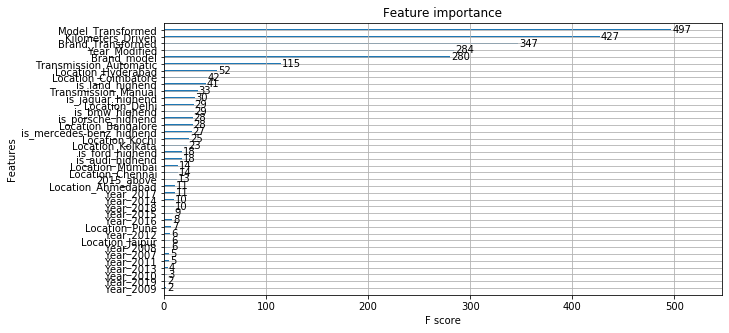

In [1044]:
xgb.plot_importance(best_xgb_model)

In [1045]:
import numpy as np
train_data
for i in range(90,101,1):
    print(i ,' ',np.percentile(train_data.Price,i))

90   22.46500000000001
91   24.0
92   25.73920000000001
93   27.93480000000003
94   29.95
95   32.27849999999993
96   35.515999999999984
97   39.5
98   45.579399999999985
99   56.0
100   160.0


In [1046]:
brand_name=[]
model_name=[]
version=[]
for i,j in train_data.iterrows ():
    brand_name.append(j['Name'].split()[0].lower())
    model_name.append(j['Name'].split()[1].lower())
    version.append("".join(j['Name'].split()[2:1]).lower())
train_data['Brand']=brand_name
train_data["Model"]=model_name
train_data['Version']=version

In [1047]:
len(train_data.Brand.unique().tolist())

30

In [1048]:
X_train,X_test,y_train,y_test=train_test_split(train_data1,data_train_target,test_size=0.33)

In [1049]:
X_train['Brand_model']=X_train['Brand_Transformed']*X_train['Model_Transformed']

C:\Users\NIKHIL\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [1050]:
dataset_cnt = X_train.shape[0]
sum=0
std_list=[]
import statistics
for col_name in ['Brand_Transformed','Model_Transformed','Location_Transformed','Year_Modified','Brand_model']:
    sum=0
    for i in X_train[col_name].unique().tolist():

        if X_train[X_train[col_name]==i][col_name].shape[0]>1:
            sum=sum+((X_train[X_train[col_name]==i][col_name].count()/dataset_cnt)*(statistics.stdev(X_train[X_train[col_name]==i]['Price'])))

        else :

              sum=sum+((X_train[X_train[col_name]==i][col_name].count()/dataset_cnt)*0)
    std_list.append([col_name, sum])

In [1051]:
statistics.stdev(X_train['Price'])

10.819545914361617

In [1052]:
std_list

[['Brand_Transformed', 5.2184052325482035],
 ['Model_Transformed', 2.4628245924600622],
 ['Location_Transformed', 10.139956961976427],
 ['Year_Modified', 9.729053484912484],
 ['Brand_model', 2.6376893991986177]]

In [1053]:
train_data1.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price', 'Brand', 'Model', 'Version', 'Year_Modified',
       'Brand_Transformed', 'Model_Transformed', 'Version_Transformed',
       'Location_Transformed', 'Transmission_Transformed',
       'Location_Ahmedabad', 'Location_Bangalore', 'Location_Chennai',
       'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad',
       'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata',
       'Location_Mumbai', 'Location_Pune', 'Year_1998', 'Year_1999',
       'Year_2000', 'Year_2001', 'Year_2002', 'Year_2003', 'Year_2004',
       'Year_2005', 'Year_2006', 'Year_2007', 'Year_2008', 'Year_2009',
       'Year_2010', 'Year_2011', 'Year_2012', 'Year_2013', 'Year_2014',
       'Year_2015', 'Year_2016', 'Year_2017', 'Year_2018', 'Year_2019',
       'Transmission_Automatic', 'Transmission_Manual', 'is_audi_highend',
       'is_bmw_highend', 

In [1054]:
train_data1=train_data[train_data.Price<75].copy()

In [1055]:
y=pd.DataFrame(columns=['Price'])

In [1056]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
y=train_data1['Price'].tolist()
X=train_data1.drop(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price', 'Brand', 'Model', 'Version','Transmission_Transformed',
       'Location_Ahmedabad', 'Location_Bangalore', 'Location_Chennai',
       'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad',
       'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata',
       'Location_Mumbai', 'Location_Pune', 'Year_1998', 'Year_1999',
       'Year_2000', 'Year_2001', 'Year_2002', 'Year_2003', 'Year_2004',
       'Year_2005', 'Year_2006', 'Year_2007', 'Year_2008', 'Year_2009',
       'Year_2010', 'Year_2011', 'Year_2012', 'Year_2013', 'Year_2014',
       'Year_2015', 'Year_2016', 'Year_2017', 'Year_2018', 'Year_2019',
       'Transmission_Automatic', 'Transmission_Manual', 'is_audi_highend',
       'is_bmw_highend', 'is_bentley_highend', 'is_ford_highend',
       'is_jaguar_highend', 'is_lamborghini_highend', 'is_land_highend',
       'is_mercedes-benz_highend', 'is_porsche_highend', 'Below_2000',
       '2000_2005', '2005_2010', '2010_2015', '2015_above'],axis=1)

bestfeatures=SelectKBest(score_func=f_regression,k='all')
fit=bestfeatures.fit(X,y)
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(X.columns)

featureScores=pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns=['Specs','Scores']
print(featureScores.nlargest(10,'Scores'))

                  Specs      Scores
0         Year_Modified  657.633831
1     Brand_Transformed  123.050620
4  Location_Transformed   79.097346
3   Version_Transformed   53.285260
2     Model_Transformed   11.815397


In [1057]:
train_data1.drop(['Name', 'Location','Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power','Brand', 'Model', 'Version','Transmission_Transformed',
       'Location_Ahmedabad', 'Location_Bangalore', 'Location_Chennai',
       'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad',
       'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata',
       'Location_Mumbai', 'Location_Pune', 'Year_1998', 'Year_1999',
       'Year_2000', 'Year_2001', 'Year_2002', 'Year_2003', 'Year_2004',
       'Year_2005', 'Year_2006', 'Year_2007', 'Year_2008', 'Year_2009',
       'Year_2010', 'Year_2011', 'Year_2012', 'Year_2013', 'Year_2014',
       'Year_2015', 'Year_2016', 'Year_2017', 'Year_2018', 'Year_2019',
       'Transmission_Automatic', 'Transmission_Manual', 'is_audi_highend',
       'is_bmw_highend', 'is_bentley_highend', 'is_ford_highend',
       'is_jaguar_highend', 'is_lamborghini_highend', 'is_land_highend',
       'is_mercedes-benz_highend', 'is_porsche_highend', 'Below_2000',
       '2000_2005', '2005_2010', '2010_2015', '2015_above'],axis=1,inplace=True)

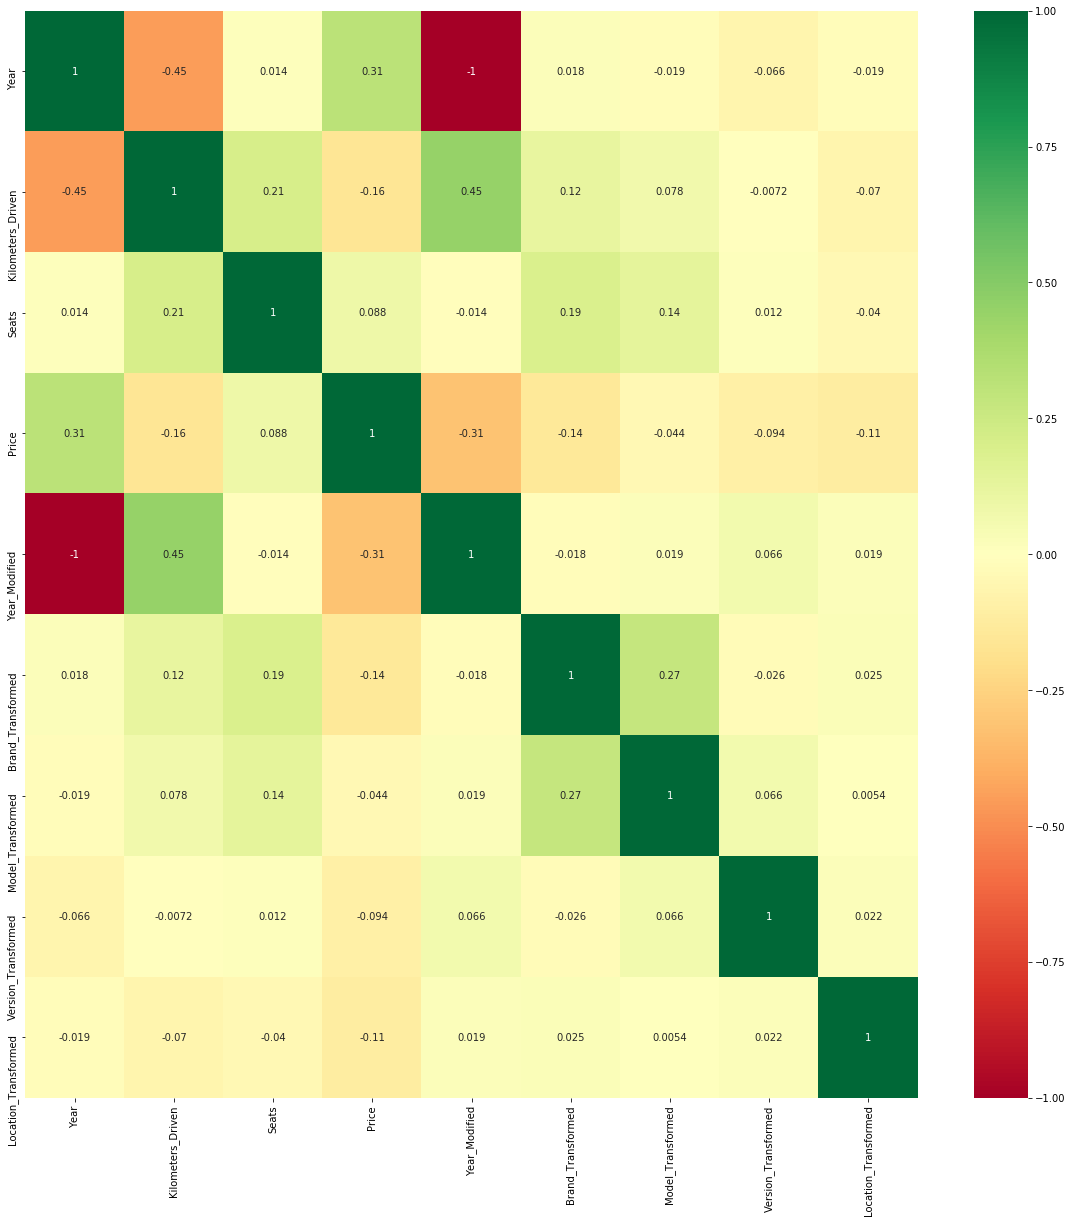

In [1058]:
import pandas as pd
import numpy as np
import seaborn as sns

y=train_data1['Price'].tolist()
X=train_data1
corrmat=train_data1.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))

g=sns.heatmap(train_data1[top_corr_features].corr(),annot=True,cmap='RdYlGn')